# Dealing with Categorical Variables - Lab

## Introduction

In this lab, you'll explore the Ames Housing dataset and identify numeric and categorical variables. Then you'll transform some categorical data and use it in a multiple regression model.

## Objectives

You will be able to:

* Determine whether variables are categorical or numeric
* Use one-hot encoding to create dummy variables

## Step 1: Load the Ames Housing Dataset

Import `pandas`, and use it to load the file `ames.csv` into a dataframe called `ames`. If you pass in the argument `index_col=0` this will set the "Id" feature as the index.

In [2]:
# Your code here - load the dataset
import numpy as np  
import pandas as pd  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score  
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df_ames = pd.read_csv('ames.csv', index_col = 0)
df_ames.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Visually inspect `ames` (it's ok if you can't see all of the columns).

In [4]:
df_ames.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Go ahead and drop all **columns** with missing data, to simplify the problem. Remember that you can use the `dropna` method ([documentation here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)).

In [5]:
# Your code here - drop columns with missing data
df_ames.dropna(axis=1, inplace=True)


In [6]:
df_ames.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
int_columns = df_ames.select_dtypes(include = 'int')
int_columns

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
2,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
3,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
4,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
5,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1457,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1458,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500


In [8]:
df_ames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 61 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  YearBuilt      1460 non-null   int64 
 17  YearRemodAdd   1460 non-null   int64 
 18  RoofStyle      1460 non-null

## Step 2: Identify Numeric and Categorical Variables

The file `data_description.txt`, located in this repository, has a full description of all variables.

Using this file as well as `pandas` techniques, identify the following predictors:

1. A **continuous numeric** predictor
2. A **discrete numeric** predictor
3. A **string categorical** predictor
4. A **discrete categorical** predictor

(Note that `SalePrice` is the target variable and should not be selected as a predictor.)

For each of these predictors, visualize the relationship between the predictor and `SalePrice` using an appropriate plot.

Finding these will take some digging -- don't be discouraged if they're not immediately obvious. The Ames Housing dataset is a lot more complex than the Auto MPG dataset. There is also no single right answer here.

### Continuous Numeric Predictor

In [9]:
# Your code here - continuous numeric predictor

numeric_cols = df_ames.select_dtypes(include=[np.number])

# Step 2: Filter columns with high cardinality (e.g., more than 10 unique values)
continous_cols = [col for col in numeric_cols.columns if df_ames[col].nunique() > 10]

print(continous_cols)

# Continous Numeric Variable is = 'LotArea'

['MSSubClass', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal', 'MoSold', 'SalePrice']


### Continous Numeric Variable is = 'LotArea'

### Discrete Numeric Predictor

In [10]:
# Your code here - discrete numeric predictor

discrete_cols = [col for col in df_ames.select_dtypes(include='int').columns 
                 if df_ames[col].nunique() <= 10]  # Adjust threshold as needed

discrete_df = df_ames[discrete_cols]

discrete_df

# Descrete Numeric Predictor = OverallQual

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,PoolArea,YrSold
Id,,,,,,,,,,,,
1,7,5,1,0,2,1,3,1,0,2,0,2008
2,6,8,0,1,2,0,3,1,1,2,0,2007
3,7,5,1,0,2,1,3,1,1,2,0,2008
4,7,5,1,0,1,0,3,1,1,3,0,2006
5,8,5,1,0,2,1,4,1,1,3,0,2008
...,...,...,...,...,...,...,...,...,...,...,...,...
1456,6,5,0,0,2,1,3,1,1,2,0,2007
1457,6,6,1,0,2,0,3,1,2,2,0,2010
1458,7,9,0,0,2,0,4,1,2,1,0,2010


### Descrete Numeric Predictor = OverallQual

### String Categorical Predictor

In [11]:
# Your code here - string categorical predictor
str_categorical = df_ames.select_dtypes(include=['object', 'string'])
[col for col in str_categorical.columns if df_ames[col].nunique() <= 20]

str_categorical.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


#### String categorical predictor  is "Neighbourhood" 

### Discrete Categorical Predictor

In [12]:
# Your code here - discrete categorical predictor
categorical_cols = df_ames.select_dtypes(include=['object', 'category'])

discrete_cat_cols = [col for col in categorical_cols.columns if df_ames[col].nunique() <= 10]

discrete_cat_df = df_ames[discrete_cat_cols] #creates a dataFrame with only discrete categorical predictors

list(discrete_cat_df)

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'KitchenQual',
 'Functional',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [13]:
discrete_cat_df

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,ExterCond,Foundation,Heating,HeatingQC,CentralAir,KitchenQual,Functional,PavedDrive,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
2,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,...,TA,CBlock,GasA,Ex,Y,TA,Typ,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
4,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,...,TA,BrkTil,GasA,Gd,Y,Gd,Typ,Y,WD,Abnorml
5,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,...,TA,PConc,GasA,Ex,Y,Gd,Typ,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,TA,PConc,GasA,Ex,Y,TA,Typ,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,TA,CBlock,GasA,TA,Y,TA,Min1,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,...,Gd,Stone,GasA,Ex,Y,Gd,Typ,Y,WD,Normal


#### The best Descrete categorical would be "Kitchen Quality": EX(Exellent); Gd(Good); TA(Typical/Average): Fa(Fair); Po(Poor)

## Step 3: Build a Multiple Regression Model with Your Chosen Predictors

Choose the best-looking 3 out of 4 predictors to include in your model.

Make sure that you one-hot encode your categorical predictor(s) (regardless of whether the current data type is a string or number) first.

In [14]:
value_counts = df_ames[['OverallQual', 'Neighborhood', 'KitchenQual']].apply(lambda x: x.value_counts())

print(value_counts)


         OverallQual  Neighborhood  KitchenQual
1                2.0           NaN          NaN
2                3.0           NaN          NaN
3               20.0           NaN          NaN
4              116.0           NaN          NaN
5              397.0           NaN          NaN
6              374.0           NaN          NaN
7              319.0           NaN          NaN
8              168.0           NaN          NaN
9               43.0           NaN          NaN
10              18.0           NaN          NaN
Blmngtn          NaN          17.0          NaN
Blueste          NaN           2.0          NaN
BrDale           NaN          16.0          NaN
BrkSide          NaN          58.0          NaN
ClearCr          NaN          28.0          NaN
CollgCr          NaN         150.0          NaN
Crawfor          NaN          51.0          NaN
Edwards          NaN         100.0          NaN
Ex               NaN           NaN        100.0
Fa               NaN           NaN      

In [15]:
# Your code here - prepare X and y, including one-hot encoding
from sklearn.feature_selection import SelectKBest, f_regression

X = df_ames[['LotArea', 'OverallQual', 'Neighborhood', 'KitchenQual']]
y = df_ames['SalePrice']

X_encode = pd.get_dummies(X, drop_first=True)
X_encode.head()


,LotArea,OverallQual,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,9600,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,11250,7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9550,7,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,14260,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Your answer here - which category or categories were dropped?
Dropped the Neighborhood category

In [16]:
# Your code here - build a regression model and display results
features = ['LotArea', 'OverallQual', 'KitchenQual']
target = ['SalePrice']

X = df_ames[features]
y = df_ames[target]

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

# Fit the model
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

print('Intercept:', model_1.intercept_)
print('coefficients:', model_1.coef_)

Intercept: [20871.95735101]
coefficients: [[ 1.33028413e+00  3.51952934e+04 -8.58123226e+04 -6.19085400e+04
  -8.28943378e+04]]


In [17]:
#stattsModel for modelling. # add a constant
X_encode = sm.add_constant(X_encode)

#fit the model
model_2 = sm.OLS(y, X_encode).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     158.0
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:48:54   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.505e+04
Df Residuals:                    1430   BIC:                         3.521e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 5.295e+04 

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


## Step 4: Create Partial Regression Plots for Features

For each feature of the regression above (including the dummy features), plot the partial regression.

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\graphics\regressionplots.py:561: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()
<ipython-input-18-b3f1c44fb71f>:6: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


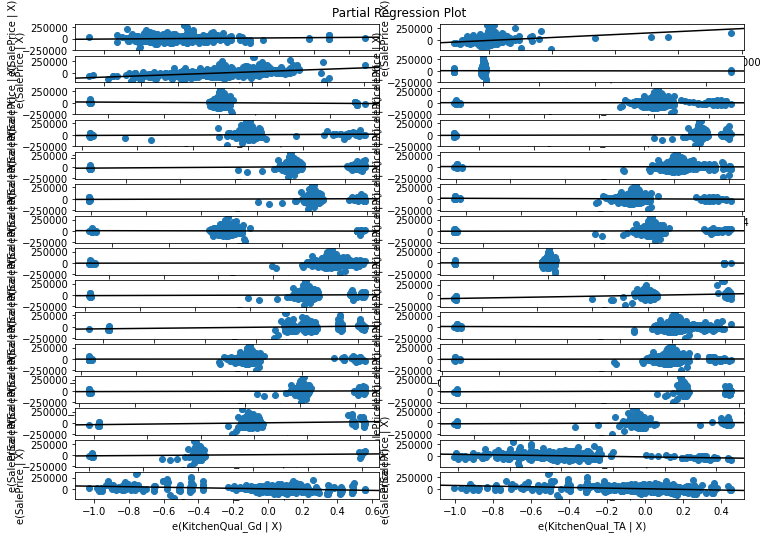

In [18]:
# Your code here - create partial regression plots
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_partregress_grid(model_2, fig=fig)
plt.tight_layout()
plt.show()


## Step 5: Calculate an Error-Based Metric

In addition to the adjusted R-Squared that we can see in the model summary, calculate either MAE or RMSE for this model.

In [21]:
# Your code here - calculate an error-based metric
# Predict using the statsmodels model

from sklearn.metrics import mean_absolute_error, mean_squared_error

X_with_const = sm.add_constant(X, has_constant='add')

#fit the model
model_2 = sm.OLS(y, X_with_const).fit()

y_pred = model_2.predict(X_with_const)

print(model_2.summary())

# Calculate MAE
mae = mean_absolute_error(y, y_pred)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     683.3
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:58:09   Log-Likelihood:                -17662.
No. Observations:                1460   AIC:                         3.534e+04
Df Residuals:                    1454   BIC:                         3.537e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.141e+04   1.02e+04      2.

c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


## Step 6: Summarize Findings

Between the model results, partial regression plots, and error-based metric, what does this model tell you? What would your next steps be to improve the model?

In [ ]:
# Your answer here
R2 = 0.701: hence the model explains 70.1% of the variance in SalePrice

Adjusted R2 = 0.700: Not near zero hence model not fitting well due to other predictors that can be explored more

## Level Up (Optional)

Try transforming X using scikit-learn _and_ fitting a scikit-learn linear regression as well. If there are any differences in the result, investigate them.

In [38]:
# Your code here

## Summary

In this lab, you practiced your knowledge of categorical variables on the Ames Housing dataset! Specifically, you practiced distinguishing numeric and categorical data. You then created dummy variables using one hot encoding in order to build a multiple regression model.